In [1]:
import sys

if "./src" not in sys.path:
    sys.path.append("./src")

In [2]:
%matplotlib inline
import matplotlib.pyplot as pl
import data_helpers as dh
import helper_funcs as hf

pl.rcParams["figure.figsize"] = (15, 10)
pl.style.use('ggplot')

In [3]:
pl.rcParams["figure.figsize"] = (15, 10)


In [4]:
try:
    data, info = hf.read_data("../SPH2_031612.csv")
except FileNotFoundError:
    data, info = hf.read_data("SPH2_031612.csv")
    

data, info = dh.prepare_data(data=data, info=info)

In [5]:
day = 0
rate = .03
q = rate
maturity = info[day].mat
spot = info[day].spot
is_call = True
strikes = data.strikes[is_call][day]
prices = data.prices[is_call][day]

args = (spot, strikes, maturity, rate, q, is_call)

In [41]:
import ls_pricing as ls
import vg_pricing as vg
import heston_pricing as he
import numpy as np
from importlib import reload
import integration

In [42]:
spot = 100
strikes = np.array([90, 100, 110])
t = 1.
r = .01
q = r
is_call = False

args = (spot, strikes, t, r, q, is_call)

In [66]:
dots = np.array(range(1, 1001)) * .01

In [71]:
vals_ls = ls.ls_psi(v=dots, beta=1.25, r=r, d=r, t=t, sigma=1e-1, alpha=1.90001)

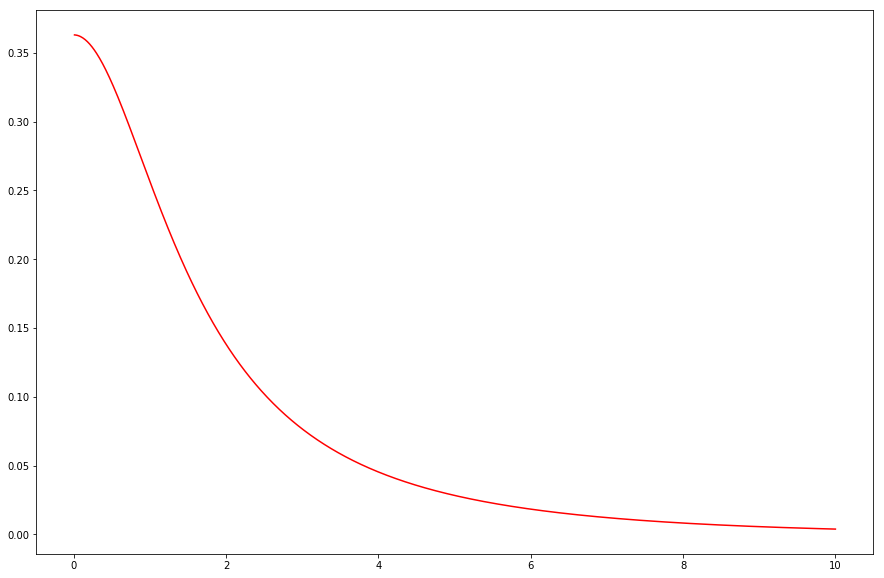

In [72]:
pl.plot(dots, np.abs(vals_ls), 'r')

In [23]:
from scipy.integrate import quad, simps
from time import time


t0 = time()
print(simps(ls.ls_integrand_vectorized(v=dots, k=np.log(strikes / spot), t=t, r=r, d=r, beta=1.25,
                                       sigma=.05, alpha=1.3), x=dots))
print(time() - t0)

[ 0.0728478  -0.1087769  -0.22591369]
0.07102513313293457


In [32]:
t0 = time()
print(quad(func=lambda v: ls.ls_integrand(v=v, k=np.log(strikes[0] / spot), t=t, r=r, d=r, beta=1.25,
                                          sigma=.05, alpha=1.3), a=0, b=np.Inf))
print(time() - t0)

(0.33780423772075147, 1.1866633278267504e-08)
0.01336669921875


In [25]:
integration = reload(integration)
t0 = time()
print(integration.integrator.integrate(
    f=lambda v: ls.ls_integrand_vectorized(
        v=v, k=np.log(strikes / spot), t=t, r=r, d=r, beta=1.25, sigma=.05, alpha=1.3), 
    lower=dots[0], upper=dots[-1]))
print(time() - t0)

[ 2.46602816  2.0830998   1.71621326]
0.0035419464111328125


In [27]:
t0 = time()
print(integration.integrator.integrate(
    f=lambda v: ls.ls_integrand_vectorized(
        v=v, k=np.log(strikes / spot), t=t, r=r, d=r, beta=1.25, sigma=.05, alpha=1.3), 
    lower=0, upper=100000))
print(time() - t0)

[ 6.03348868  6.03255831  6.03101518]
0.0029790401458740234
